# Data Preprocessing

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


pd.set_option('display.max_columns', None)
LABEL_COLUMN_NAME = 'label'
SCALE_METHOD = 'standard'
TOP_K = 100

**Utility functions for data preprocessing**

In [126]:
def handle_missing_values_and_duplicates(dataframe):
    print(dataframe.isnull().sum())

    # drop the rows where the target is missing
    dataframe.dropna(subset=[LABEL_COLUMN_NAME], inplace=True)


    # Fill missing values
    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':  # Check if column is string
            dataframe[column] = dataframe[column].fillna(dataframe[column].mode()[0])
        else:  # Otherwise, it's a numeric column
            dataframe[column] = dataframe[column].fillna(dataframe[column].mean())

    #  Drop duplicates
    dataframe.drop_duplicates(inplace=True)

    # Reset the index
    dataframe = dataframe.reset_index(drop=True)


    # Show the number of attributes (columns) and number of records (rows)
    print("Number of attributes: ", dataframe.shape[1])
    print("Number of records: ", dataframe.shape[0])

    return dataframe

In [127]:
def scale_features(features, scaler, columns_to_scale=None):
    if scaler == 'minmax':
        scaler = MinMaxScaler()
    elif scaler == 'standard':
        scaler = StandardScaler()
    else:
        raise ValueError("Invalid scaler")
    
    if columns_to_scale is None:
        return scaler.fit_transform(features)
    else:
        # duplicate the features
        features = features.copy()
        features[columns_to_scale] = scaler.fit_transform(features[columns_to_scale])
        return features

In [128]:
def process_features(dataframe, scaler=SCALE_METHOD):

    features = dataframe.drop(LABEL_COLUMN_NAME, axis=1)

    # get name of columns with datatype object
    object_columns = features.select_dtypes(include=['object']).columns

    # convert the object columns to categorical
    for col in object_columns:
        features[col] = features[col].astype('category')



    columns = features.columns

    
    # drop columns with only one value
    columns_to_drop = [col for col in columns if features[col].nunique() == 1]
    features = features.drop(columns=columns_to_drop)



    # Encoding---------------------------------------------------------

    # columns for label encoding - columns with 2 unique values
    columns_to_label_encode = [col for col in columns if features[col].nunique() == 2]

    # columns for one hot encoding - columns with more than 2 unique values from categorical columns
    categorical_columns = features.select_dtypes(include=['category']).columns
    columns_to_one_hot_encode = [col for col in categorical_columns if features[col].nunique() > 2]


    # columns_to_one_hot_encode = columns_to_one_hot_encode + columns_to_label_encode
    # columns_to_label_encode = []

    # columns to scale - columns  - these three
    columns_to_scale = list(set(columns) - set(columns_to_drop) - set(columns_to_label_encode) - set(columns_to_one_hot_encode))




    # one hot encode columns
    features = pd.get_dummies(features, columns=columns_to_one_hot_encode)

    # label encode columns
    label_encoder = LabelEncoder()
    for col in columns_to_label_encode:
        features[col] = label_encoder.fit_transform(features[col])

    

    # scaling -------------------------------------
    features_scaled = scale_features(features, scaler, columns_to_scale)
    features_df = pd.DataFrame(features_scaled, columns=features.columns)



    print("Columns to drop: ", columns_to_drop)
    print("Columns to label encode: ", columns_to_label_encode)
    print("Columns to one hot encode: ", columns_to_one_hot_encode)
    print("Columns to scale: ", columns_to_scale)

    return features_df

In [129]:
def process_labels(dataframe):
    labels = dataframe[LABEL_COLUMN_NAME]
    
    # label encode the labels
    encoder = LabelEncoder()
    labels = encoder.fit_transform(labels)
    

    # scaled feature dataframe
    labels_df = pd.DataFrame(labels, columns=[LABEL_COLUMN_NAME])

    return labels_df

## Dataset 1

In [130]:
# DATASET_PATH = '../datasets/Telco-Customer-Churn/WA_Fn-UseC_-Telco-Customer-Churn.csv'
# LABEL_COLUMN_NAME = 'Churn'

# dataframe = pd.read_csv(DATASET_PATH)

# # Show the number of attributes (columns) and number of records (rows)
# print("Number of attributes: ", dataframe.shape[1])
# print("Number of records: ", dataframe.shape[0])

# dataframe.head()

In [131]:
# # drop the customerID column
# dataframe.drop('customerID', axis=1, inplace=True)

# # Replace the cells with ' ' with np.nan
# dataframe = dataframe.replace(' ', np.nan)

# # Convert TotalCharges to numeric
# dataframe['TotalCharges'] = pd.to_numeric(dataframe['TotalCharges'])

In [132]:
# dataframe = handle_missing_values_and_duplicates(dataframe)
# features_df = process_features(dataframe)
# labels_df = process_labels(dataframe)
# feature_names = features_df.columns

In [133]:
# X = features_df.values
# y = labels_df.values.flatten()

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Dataset 2

In [134]:
# DATASET_PATH = '../datasets/adult/adult.data'
# DATASET_PATH2 = '../datasets/adult/adult.test'
# LABEL_COLUMN_NAME = 'class'

# df_train = pd.read_csv(DATASET_PATH, header=None)
# df_test = pd.read_csv(DATASET_PATH, header=None)


# feature_name = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
#                 'marital-status', 'occupation', 'relationship', 'race', 'sex',
#                 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class']

# df_train.columns = feature_name
# df_test.columns = feature_name


# # Show the number of attributes (columns) and number of records (rows)
# print("Number of attributes: ", df_train.shape[1])
# print("Number of records: ", df_train.shape[0])

# df_train.head()

In [135]:
# df_train = df_train.replace(' ?', np.nan)
# df_test = df_test.replace(' ?', np.nan)

In [136]:
# dataframe = handle_missing_values_and_duplicates(df_train)
# features_df = process_features(dataframe)
# labels_df = process_labels(dataframe)
# feature_names = features_df.columns

# X = features_df.values
# y = labels_df.values.flatten()

# X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
# dataframe = handle_missing_values_and_duplicates(df_test)
# features_df = process_features(dataframe)
# labels_df = process_labels(dataframe)
# feature_names = features_df.columns

# X_test = features_df.values
# y_test = labels_df.values.flatten()

## Dataset 3

In [138]:
DATASET_PATH = '../datasets/Credit-Card-Fraud-Detection/creditcard.csv'
LABEL_COLUMN_NAME = 'Class'

dataframe = pd.read_csv(DATASET_PATH)

# Show the number of attributes (columns) and number of records (rows)
print("Number of attributes: ", dataframe.shape[1])
print("Number of records: ", dataframe.shape[0])

dataframe.head()

Number of attributes:  31
Number of records:  284807


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [139]:
# Count the number of positive and negative samples
positive_samples = dataframe[dataframe[LABEL_COLUMN_NAME] == 1]
negative_samples = dataframe[dataframe[LABEL_COLUMN_NAME] == 0]

print("Number of positive samples: ", positive_samples.shape[0])
print("Number of negative samples: ", negative_samples.shape[0])


# Select a subset of the negative samples
negative_samples = negative_samples.sample(n=20000, random_state=42)


# Concatenate the positive and negative samples
dataframe = pd.concat([positive_samples, negative_samples], axis=0)

# Shuffle the dataset
dataframe = dataframe.sample(frac=1, random_state=42).reset_index(drop=True)

Number of positive samples:  492
Number of negative samples:  284315


In [140]:
dataframe = handle_missing_values_and_duplicates(dataframe)
features_df = process_features(dataframe)
labels_df = process_labels(dataframe)
feature_names = features_df.columns

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Number of attributes:  31
Number of records:  20470
Columns to drop:  []
Columns to label encode:  []
Columns to one hot encode:  []
Columns to scale:  ['Amount', 'V25', 'V5', 'V4', 'V26', 'V28', 'V19', 'V3', 'V18', 'V7', 'V8', 'V11', 'V2', 'V24', 'V22', 'V27', 'V13', 'V23', 'V1', 'Time', 'V16', 'V17', 'V21', 'V10', 'V20', 'V6', 'V12', 'V15', 'V14', 'V9']


In [141]:
X = features_df.values
y = labels_df.values.flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Training

From this point on, it is assumed that the data has been preprocessed and partitioned into train, validation and test sets in (X_train, y_train), (X_val, y_val) and (X_test, y_test) respectively.

In [142]:
### For Dataset 3 - Oversampling the minority class


# from imblearn.over_sampling import SMOTE
# from sklearn.utils import shuffle

# # Apply SMOTE to the training data
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Shuffle the resampled data
# X_train_resampled, y_train_resampled = shuffle(X_train_resampled, y_train_resampled, random_state=42)

# # Print the new class distribution
# print(f"Original training set shape: {X_train.shape}")
# print(f"Resampled training set shape: {X_train_resampled.shape}")
# print(f"Original training set positive class ratio: {np.sum(y_train) / len(y_train):.2%}")
# print(f"Resampled training set positive class ratio: {np.sum(y_train_resampled) / len(y_train_resampled):.2%}")


# X_train = X_train_resampled
# y_train = y_train_resampled

### Top K features

In [143]:
backup_X_train , backup_y_train = X_train, y_train
backup_X_validation, backup_y_validation = X_validation, y_validation
backup_X_test, backup_y_test = X_test, y_test

In [144]:
# TOP_K = 20

# X_train = backup_X_train
# X_validation = backup_X_validation
# X_test = backup_X_test


# train_df = pd.DataFrame(X_train)
# test_df = pd.DataFrame(X_test)
# validation_df = pd.DataFrame(X_validation)


# # add feature names
# train_df.columns = feature_names
# test_df.columns = feature_names
# validation_df.columns = feature_names


# df_labels = pd.DataFrame(y_train, columns=[LABEL_COLUMN_NAME])


# # correlation
# correlations = train_df.corrwith(df_labels[LABEL_COLUMN_NAME])

# top_k = correlations.abs().sort_values(ascending=False).head(min(TOP_K, len(correlations)))
# print(top_k)


# # take the top k features
# X_train = train_df[top_k.index].values
# X_test = test_df[top_k.index].values
# X_validation = validation_df[top_k.index].values


**Utility Functions**

In [145]:
# Accuracy Sensitivity Specificity Precision F1-score AUROC AUPR
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import confusion_matrix

def print_metrics(metrics):
    # Print header
    print(f"{'Metric':<15} {'Value':>10}")
    print("-" * 26)

    # Print each metric
    for name, value in metrics.items():
        print(f"{name:<15} {value:>10.4f}")


def print_mean_metrics(metrics):
    # Print header
    print(f"{'Metric':<15} {'Mean':>10} {'std':>10}")
    print("-" * 38)

    # Print each metric
    for name, value in metrics.items():
        print(f"{name:<15} {value['mean']:>10.4f} {value['std']:>10.4f}")


def print_report_format_metrics(metrics, row_name=""):
    print(row_name, end=" | ")
    for name, value in metrics.items():
        print(f"{value:.4f}", end=" |")
    print()
        

def print_report_format_mean_metrics(metrics, row_name=""):
    # format mean +- std
    print(row_name, end=" | ")
    for name, value in metrics.items():
        print(f"{value['mean']:.4f} ± {value['std']:.4f}", end=" |")
    print()


def get_mean_metrics(metrics_list):
    # calculate avarage and standard deviation of each metric
    metrics = {}
    for name in metrics_list[0].keys():
        values = [m[name] for m in metrics_list]
        metrics[name] = {
            "mean": np.mean(values),
            "std": np.std(values)
        }

    return metrics

def get_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    sensitivity = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    aupr = average_precision_score(y_true, y_pred)
    

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)


    return {
        "Accuracy": accuracy,
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "Precision": precision,
        "F1-score": f1,
        "AUROC": roc_auc,
        "AUPR": aupr
    }

## Logistic Regression

**Logistic Regression of scikit-learn**

In [146]:
import numpy as np
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
metrics = get_metrics(y_test, y_pred)
print_metrics(metrics)

Metric               Value
--------------------------
Accuracy            0.9958
Sensitivity         0.8049
Specificity         0.9998
Precision           0.9851
F1-score            0.8859
AUROC               0.9023
AUPR                0.7968


**Custom implementation of Logistic Regression**

In [147]:
class CustomLogisticRegression:
    def __init__(self, 
                 learning_rate=0.01, 
                 max_iter=1000,
                 regularization=None,
                 lambda_param=0.001,
                 min_loss_diff=None, 
                 random_state=None, 
                 show_loss_curve=False):
        
        self.learning_rate = learning_rate
        self.n_iters = max_iter
        self.min_loss_diff = min_loss_diff
        self.weights = None
        self.random_state = random_state
        self.show_loss_curve = show_loss_curve
        self.regularization = regularization
        self.lambda_param = lambda_param


    def _sigmoid(self, x):
        # x = np.array(x, dtype=np.float64)
        return np.clip(1 / (1 + np.exp(-x)))
    
    # log likelihood
    def _loss(self, y_pred, y_true):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        log_loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        
        if self.regularization == 'l1':
            reg_term = self.lambda_param * np.sum(np.abs(self.weights))
        elif self.regularization == 'l2':
            reg_term = 0.5 * self.lambda_param * np.sum(self.weights**2)
        else:
            reg_term = 0
        
        return log_loss + reg_term


    
    def fit(self, X, y):
        # add 1 to the features
        X = np.hstack((np.ones((X.shape[0], 1)), X))

        X = np.asarray(X, dtype=np.float64)
        y = np.asarray(y, dtype=np.float64)

        n_samples, n_features = X.shape

        
        # Initialize weights
        if self.random_state is not None:
            np.random.seed(self.random_state)
        self.weights = np.random.rand(n_features) * 0.01
        

        calculate_loss = self.show_loss_curve or self.min_loss_diff is not None
        losses = np.zeros(self.n_iters)
        max_iter_reached = 0

        
        for i in range(self.n_iters):
            y_pred = self._sigmoid(X @ self.weights)
            dw = (1 / len(X)) * (X.T @ (y_pred - y))

            # add regularization
            if self.regularization == 'l1':
                dw += self.lambda_param * np.sign(self.weights)
            elif self.regularization == 'l2':
                dw += self.lambda_param * self.weights


            self.weights = self.weights - self.learning_rate * dw

            
        
            if calculate_loss:
                loss = self._loss(y_pred, y)
                losses[i] = loss

                if self.min_loss_diff is not None:
                    if i > 0 and abs(losses[i-1] - losses[i]) < self.min_loss_diff:
                        max_iter_reached = i
                        break
        
        # show loss curve
        if self.show_loss_curve:
            if max_iter_reached > 0:
                plt.plot(range(max_iter_reached), losses[:max_iter_reached])
            else:
                plt.plot(range(self.n_iters), losses)
            plt.xlabel('Iterations')
            plt.ylabel('Loss')
            plt.title('Loss Curve')
            plt.show()


    def predict_proba(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))

        X = np.asarray(X, dtype=np.float64)

        y_pred = self._sigmoid(X @ self.weights)
        return y_pred

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) > threshold).astype(int)
            
    

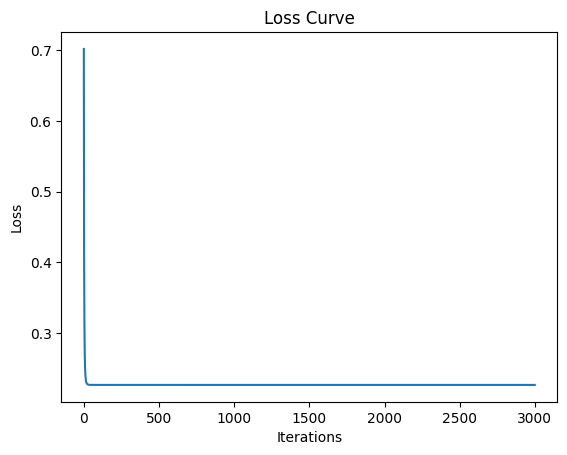

Metric               Value
--------------------------
Accuracy            0.9951
Sensitivity         0.7895
Specificity         1.0000
Precision           1.0000
F1-score            0.8824
AUROC               0.8947
AUPR                0.7944


In [148]:
# Hyperparameters
BASE_LEARNER_REGULARIZATION = 'l2'
BASE_LEARNER_LAMBDA_PARAM = 0.05
BASE_LEARNER_MAX_ITER = 3000
BASE_LEARNER_LEARNING_RATE = 0.8


clf = CustomLogisticRegression(learning_rate=BASE_LEARNER_LEARNING_RATE,
                                max_iter=BASE_LEARNER_MAX_ITER,
                                regularization=BASE_LEARNER_REGULARIZATION,
                                lambda_param=BASE_LEARNER_LAMBDA_PARAM,
                                show_loss_curve=True,
                                random_state=42)
clf.fit(X_train, y_train)

# test on validation and tune hyperparameters
y_pred = clf.predict(X_validation)
metrics = get_metrics(y_validation, y_pred)
print_metrics(metrics)


In [149]:
# test on validation and tune hyperparameters
y_pred = clf.predict(X_test)
metrics = get_metrics(y_test, y_pred)
print_metrics(metrics)

Metric               Value
--------------------------
Accuracy            0.9951
Sensitivity         0.7683
Specificity         0.9998
Precision           0.9844
F1-score            0.8630
AUROC               0.8840
AUPR                0.7609


# Bagging

In [150]:
from sklearn.utils import resample

def generate_bagging_sets(X, y, n_bags, random_state=42):
    np.random.seed(random_state)
    bags = []
    for _ in range(n_bags):
        X_resampled, y_resampled = resample(X, y, n_samples=len(X), replace=True)
        bags.append((X_resampled, y_resampled))
    return bags

In [151]:
bags = generate_bagging_sets(X_train, y_train, n_bags=9, random_state=42)

# Initialize an empty list to store individual classifiers
bagging_classifiers = []

# Train individual classifiers
for x, y in bags:
    # clf = LogisticRegression(random_state=42)
    clf = CustomLogisticRegression(learning_rate=BASE_LEARNER_LEARNING_RATE,
                                   max_iter=BASE_LEARNER_MAX_ITER,
                                   regularization=BASE_LEARNER_REGULARIZATION,
                                   lambda_param=BASE_LEARNER_LAMBDA_PARAM,
                                   random_state=42)
    clf.fit(x, y)
    bagging_classifiers.append(clf)


**Performance of models using voting ensemble**

In [152]:
from scipy import stats

# Make predictions using individual classifiers
y_pred_individual = []
indivisual_metrics = []
for i, clf in enumerate(bagging_classifiers):
    y_pred = clf.predict(X_test)
    y_pred_individual.append(y_pred)
    indivisual_metrics.append(get_metrics(y_test, y_pred))


print("Mean and standard deviation of metrics for individual classifiers")
mean_metrics = get_mean_metrics(indivisual_metrics)
print_mean_metrics(mean_metrics)


# Majority voting using mode
y_pred = stats.mode(y_pred_individual).mode


print("\n\nMetrics for majority voting")
metrics = get_metrics(y_test, y_pred)
print_metrics(metrics)

# for report copypasta
print()
print_report_format_mean_metrics(mean_metrics, "LR")
print_report_format_metrics(metrics, "Voting ensemble")
print()

Mean and standard deviation of metrics for individual classifiers
Metric                Mean        std
--------------------------------------
Accuracy            0.9951     0.0000
Sensitivity         0.7683     0.0000
Specificity         0.9998     0.0000
Precision           0.9844     0.0000
F1-score            0.8630     0.0000
AUROC               0.8840     0.0000
AUPR                0.7609     0.0000


Metrics for majority voting
Metric               Value
--------------------------
Accuracy            0.9951
Sensitivity         0.7683
Specificity         0.9998
Precision           0.9844
F1-score            0.8630
AUROC               0.8840
AUPR                0.7609

LR | 0.9951 ± 0.0000 |0.7683 ± 0.0000 |0.9998 ± 0.0000 |0.9844 ± 0.0000 |0.8630 ± 0.0000 |0.8840 ± 0.0000 |0.7609 ± 0.0000 |
Voting ensemble | 0.9951 |0.7683 |0.9998 |0.9844 |0.8630 |0.8840 |0.7609 |



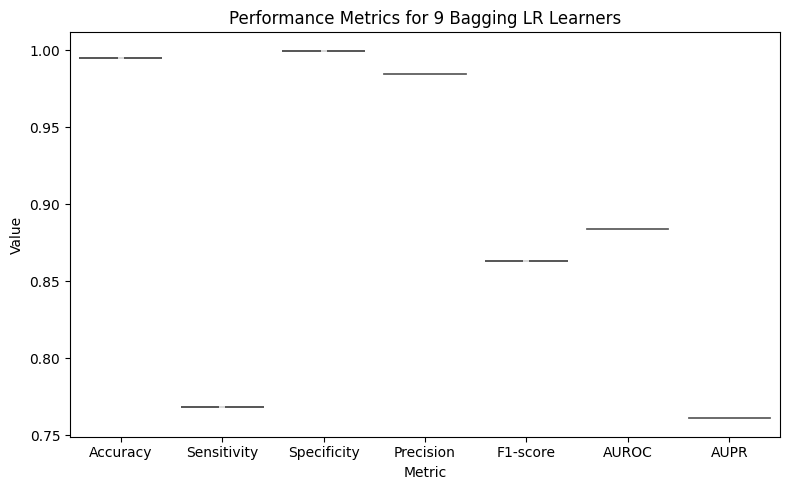

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(indivisual_metrics)

# Melt the DataFrame to long format
df_melted = df.melt(var_name='Metric', value_name='Value')

# Set a color palette for each metric
palette = sns.color_palette("Set2", len(df_melted['Metric'].unique()))

# Create the violin plot with hue assigned and palette used
plt.figure(figsize=(8, 5))
sns.violinplot(x='Metric', y='Value', data=df_melted, hue='Metric', palette=palette, dodge=False, legend=False)
plt.title('Performance Metrics for 9 Bagging LR Learners')
plt.tight_layout()
plt.show()


# Stacking

**Training the meta model**

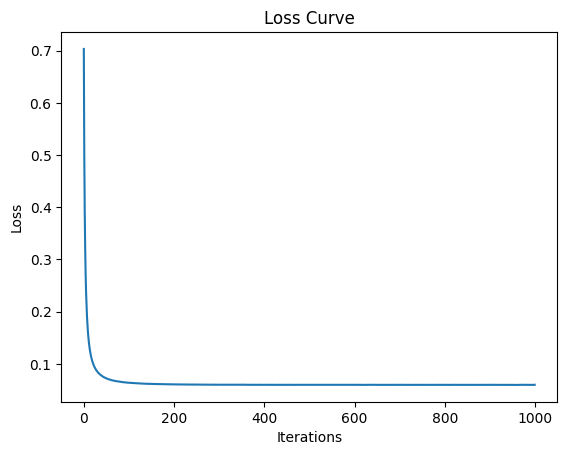

In [154]:
#  predict on validation set using the bagging classifiers
y_pred_validation = np.zeros((X_validation.shape[0], len(bagging_classifiers)))
for i, clf in enumerate(bagging_classifiers):
    y_pred_validation[:,i] = clf.predict(X_validation)


# add previous features with predictions of individual classifiers
stacking_features = np.column_stack((X_validation, y_pred_validation))


# Train a meta-model
# meta_model = LogisticRegression(random_state=42)
meta_model = CustomLogisticRegression(learning_rate=0.8, max_iter=1000, regularization="l1", lambda_param=0.005, show_loss_curve=True, random_state=42)
meta_model.fit(stacking_features, y_validation)


**Performance of models using stacking ensemble**

In [155]:
# prediction of individual classifiers on test set
y_pred_test_bagging = np.zeros((X_test.shape[0], len(bagging_classifiers)))
for i, clf in enumerate(bagging_classifiers):
    y_pred_test_bagging[:,i] = clf.predict(X_test)

# Prepare test data for stacking
stacking_features_test = np.column_stack((X_test,y_pred_test_bagging))


# Make predictions using the meta-model
y_pred = meta_model.predict(stacking_features_test)
metrics = get_metrics(y_test,y_pred)
print_metrics(metrics)



# For report copypasta
print()
print_report_format_metrics(metrics, "Stacking ensemble")


Metric               Value
--------------------------
Accuracy            0.9956
Sensitivity         0.7805
Specificity         1.0000
Precision           1.0000
F1-score            0.8767
AUROC               0.8902
AUPR                0.7849

Stacking ensemble | 0.9956 |0.7805 |1.0000 |1.0000 |0.8767 |0.8902 |0.7849 |
